# Setup

In [27]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [28]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [29]:
import json
import glob
from utils.metrics import extract_metrics_config, Metric

In [30]:
file_list = glob.glob('./experiments/configs/*flickr30k*.json')

configs = [json.load(open(file)) for file in file_list]

In [31]:
# add prefix to path

for config in configs:
    config["model"]["training"][
        "log_dir"] = "experiments/" + config["model"]["training"]["log_dir"]

# Load metrics

In [32]:
metrics = [Metric(**extract_metrics_config(config)) for config in configs]

# ROC Curve

[[<matplotlib.lines.Line2D at 0x7f4f8c1c79d0>],

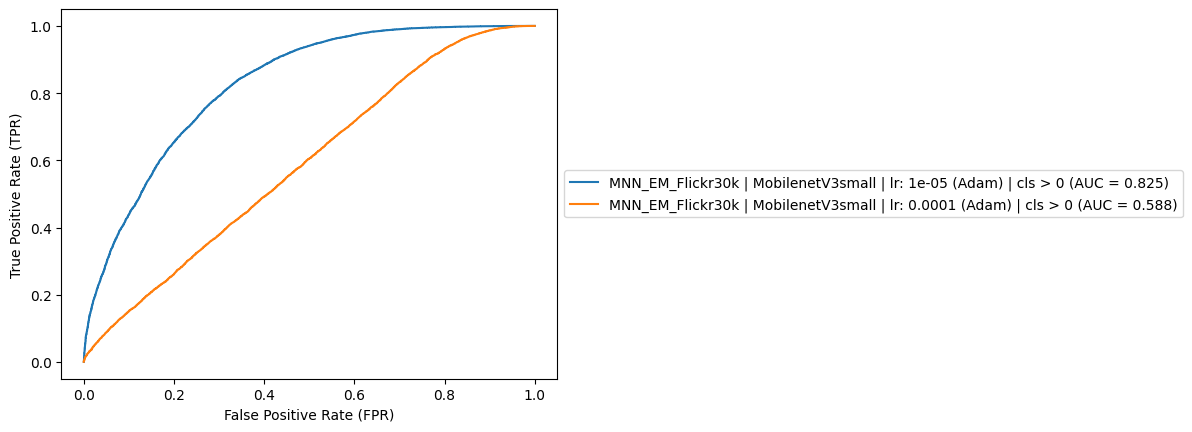

In [33]:
[metric.plot_roc() for metric in metrics]

# Precision-Recall Curve (PRC)

[[<matplotlib.lines.Line2D at 0x7f4f8c16a9a0>],

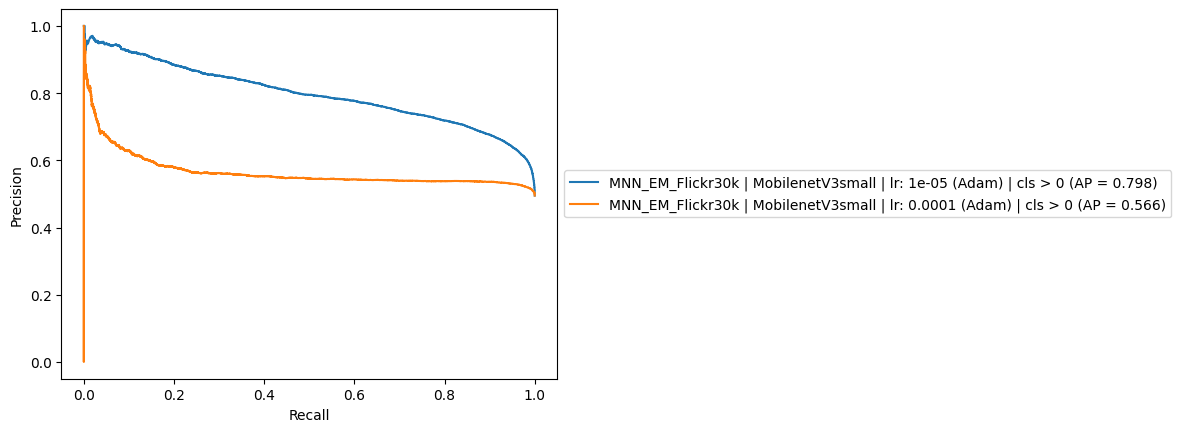

In [34]:
[metric.plot_prc() for metric in metrics]

# Optimal accuracy

The `optimize_threshold()` method calculates and outputs optimal threshold for ROC curve using G-Mean and Youden-Index/J, as well as the optimal threshold for Precision-Recall curve using F-Score.

See also https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [35]:
import pandas as pd

In [36]:
metrics_df = pd.DataFrame.from_dict(
    [metric.optimize_threshold() for metric in metrics])
metrics_df

,Model name,Image CNN,Optimizer,lr,cls,AUC-ROC,AUC-PRC,G-Mean,Threshold G-Mean,Accuracy G-Mean,J,Threshold J,Accuracy J,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,MNN_EM_Flickr30k,MobilenetV3small,Adam,0.00001,0,0.824987,0.798083,0.745032,0.517513,0.746720,0.497585,4.592264e-01,0.747853,0.676565,0.900553,0.772653,3.309002e-01,0.737564
1,MNN_EM_Flickr30k,MobilenetV3small,Adam,0.00010,0,0.587524,0.565938,0.550943,0.000622,0.552402,0.137441,6.504979e-08,0.565397,0.526652,0.968101,0.682190,3.464088e-10,0.553346
